# Spark Dataframes and Spark SQL

## Objective

Working with Spark DataFrames and Spark SQL by exploring the census data.

work with its methods to query and analyze data. 

## Data Set

Working with JSON file containing data from the 2010 U.S. Census. It has the following columns:

| Column  | Description                     |
|---------|---------------------------------|
| age     | Age (year)                      |
| females | Number of females               |
| males   | Number of males                 |
| total   | Total number of individuals     |
| year    | Year column (2010 for all rows) |

## Open and Explore The Data Sets

In [1]:
f = open('census_2010.json')

for i in range(0,4):
    print(f.readline())

{"age":"0","females":"1994141","males":"2085528","total":"4079669","year":"2010"}

{"age":"1","females":"1997991","males":"2087350","total":"4085341","year":"2010"}

{"age":"2","females":"2000746","males":"2088549","total":"4089295","year":"2010"}

{"age":"3","females":"2002756","males":"2089465","total":"4092221","year":"2010"}



In [2]:
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext()

In [3]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
df = sqlCtx.read.json("census_2010.json")
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [4]:
df.printSchema()

root
 |-- age: string (nullable = true)
 |-- females: string (nullable = true)
 |-- males: string (nullable = true)
 |-- total: string (nullable = true)
 |-- year: string (nullable = true)



In [5]:
df.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



## Selecting Columns

In [6]:
df[['age','males','females']].show()

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
|  5|2091803|2005925|
|  6|2093905|2007781|
|  7|2097080|2010281|
|  8|2101670|2013771|
|  9|2108014|2018603|
| 10|2114217|2023289|
| 11|2118390|2026352|
| 12|2132030|2037286|
| 13|2159943|2060100|
| 14|2195773|2089651|
| 15|2229339|2117689|
| 16|2263862|2146942|
| 17|2285295|2165852|
| 18|2285990|2168175|
| 19|2272689|2159571|
+---+-------+-------+
only showing top 20 rows



## Filtering Rows

In [7]:
five_plus = df[df['age'] > 5]
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



## Using Column Comparisons As Filters

In [8]:
df[df['females'] < df['males']].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



## Converting Spark DataFrames To Pandas DataFrames

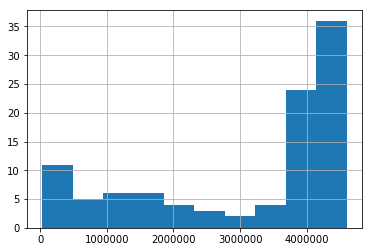

In [15]:
%matplotlib inline
pandas_df = df.toPandas()
pandas_df["total"] = pandas_df["total"].astype(float)
pandas_df["total"].hist()

## Register The DataFrame As A Table

In [13]:
df.registerTempTable('census2010')
tables = sqlCtx.tableNames()
print(tables)


['census2010']


## Querying

In [14]:
sqlCtx.sql("SELECT age FROM census2010").show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



## Filtering

In [16]:
query = ""
query = "SELECT males,females FROM census2010 WHERE age > 5 AND age < 15"
sqlCtx.sql(query).show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



## Mixing Functionality (Dataframes and SQL)

In [17]:
query = ""
query = "SELECT males,females FROM census2010"
sqlCtx.sql(query).describe().show()

+-------+
|summary|
+-------+
|  count|
|   mean|
| stddev|
|    min|
|    max|
+-------+



## Multiple tables

Read additional datasets into DataFrame objects and then use the registerTempTable() function to register these tables individually within SQLContext. 

In [19]:
df_2010 = sqlCtx.read.json("census_2010.json")
df.registerTempTable('census2010')

df_2000 = sqlCtx.read.json("census_2000.json")
df_1990 = sqlCtx.read.json("census_1990.json")
df_1980 = sqlCtx.read.json("census_1980.json")

df_2000.registerTempTable('census2000')
df_1990.registerTempTable('census1990')
df_1980.registerTempTable('census1980')
tables = sqlCtx.tableNames()
print(tables)

['census2000', 'census1990', 'census2010', 'census1980']


## Joins

In [20]:
query = """
 SELECT census2010.total, census2000.total
 FROM census2010
 INNER JOIN census2000
 ON census2010.age=census2000.age
"""

sqlCtx.sql(query).show()

+-------+-------+
|  total|  total|
+-------+-------+
|4079669|3733034|
|4085341|3825896|
|4089295|3904845|
|4092221|3970865|
|4094802|4024943|
|4097728|4068061|
|4101686|4101204|
|4107361|4125360|
|4115441|4141510|
|4126617|4150640|
|4137506|4152174|
|4144742|4145530|
|4169316|4139512|
|4220043|4138230|
|4285424|4137982|
|4347028|4133932|
|4410804|4130632|
|4451147|4111244|
|4454165|4068058|
|4432260|4011192|
+-------+-------+
only showing top 20 rows



## SQL Functions

In [21]:
query = """
 SELECT sum(census2010.total), sum(census2000.total), sum(census1990.total)
 FROM census2010
 INNER JOIN census2000
 ON census2010.age=census2000.age
 INNER JOIN census1990
 ON census2010.age=census1990.age
"""

sqlCtx.sql(query).show()

+------------+------------+------------+
|         _c0|         _c1|         _c2|
+------------+------------+------------+
|3.12247116E8|2.84594395E8|2.54506647E8|
+------------+------------+------------+

